In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv("C:\iCloudDrive\DataCamp\data/bank_transactions.csv")
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


### Cleaning and Manipulating Data

In [59]:
# Remove Location
df.drop("CustLocation", axis=1, inplace=True)

# Convert INR to USD 
df["CustAccountBalance"] = df["CustAccountBalance"].apply(lambda x: x * 0.014)
df["TransactionAmount (USD)"] = df["TransactionAmount (INR)"].apply(lambda x: x * 0.014)
df.drop("TransactionAmount (INR)", axis=1, inplace=True)


# Convert Gender to float
df["CustGender"] = df["CustGender"].apply(lambda x: 0 if x == "M" else 1)

In [60]:
def parse_date(date_str):
    try:
        # Avoid parsing to years > 2016
        date = pd.to_datetime(date_str, dayfirst=True, errors='coerce')
        if date.year > 2016:
            date = date.replace(year=date.year - 100)
        if date.year == 1800:
            date = pd.NaT
        return date
    except ValueError:
        return pd.NaT

In [61]:
# Convert Date to datetime
df["TransactionDate"] = df["TransactionDate"].apply(parse_date)
df["CustomerDOB"] = df["CustomerDOB"].apply(parse_date)


In [62]:
# TransactionTime has different lengths -> we can´t convert to datetime
df["timeLength"] = df["TransactionTime"].apply(lambda x: len(str(x)))
df["timeLength"].value_counts()

6    922118
5    108472
4     14098
3      3498
2       320
1        61
Name: timeLength, dtype: int64

In [63]:
# Add leading zeros
df["TransactionTime"] = df["TransactionTime"].apply(lambda x: str(x).zfill(6))

In [64]:
df["timeLength"] = df["TransactionTime"].apply(lambda x: len(str(x)))
df["timeLength"].value_counts()

6    1048567
Name: timeLength, dtype: int64

In [65]:
df.drop("timeLength", axis=1, inplace=True)

In [66]:
# Convert Time to datetime
df["TransactionTime"] = df["TransactionTime"].apply(lambda x: pd.to_datetime(str(x), format='%H%M%S').time())


In [67]:
df["TransactionWeekday"] = df["TransactionDate"].dt.weekday
df["TransactionHour"] = df["TransactionTime"].apply(lambda x: x.hour)

# calculate the age precisely
df["CustomerAge"] = df["TransactionDate"].dt.year - df["CustomerDOB"].dt.year

In [68]:
df.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                          int64
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                    object
TransactionAmount (USD)           float64
TransactionWeekday                  int64
TransactionHour                     int64
CustomerAge                       float64
dtype: object

In [69]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (USD),TransactionWeekday,TransactionHour,CustomerAge
0,T1,C5841053,1994-01-10,1,249.46670,2016-08-02,14:32:07,0.350,1,14,22.0
1,T2,C2142763,1957-04-04,0,31.78966,2016-08-02,14:18:58,391.986,1,14,59.0
2,T3,C4417068,1996-11-26,1,250.24216,2016-08-02,14:27:12,6.426,1,14,20.0
3,T4,C5342380,1973-09-14,1,12131.04494,2016-08-02,14:27:14,28.840,1,14,43.0
4,T5,C9031234,1988-03-24,1,94.00202,2016-08-02,18:11:56,24.675,1,18,28.0


### Data Analysis and Visualization

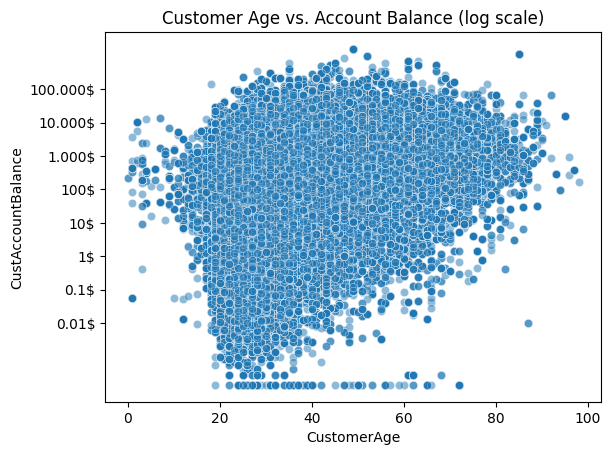

In [ ]:
# Plotting customer age against account balance
sns.scatterplot(data=df, x="CustomerAge", y="CustAccountBalance", alpha=0.5)
plt.yscale("log")
plt.yticks([0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], ["0.01$", "0.1$", "1$", "10$", "100$", "1.000$", "10.000$", "100.000$"])
plt.title("Customer Age vs. Account Balance (log scale)")
plt.show()

You can see that the older the people are the higher their account balance. 

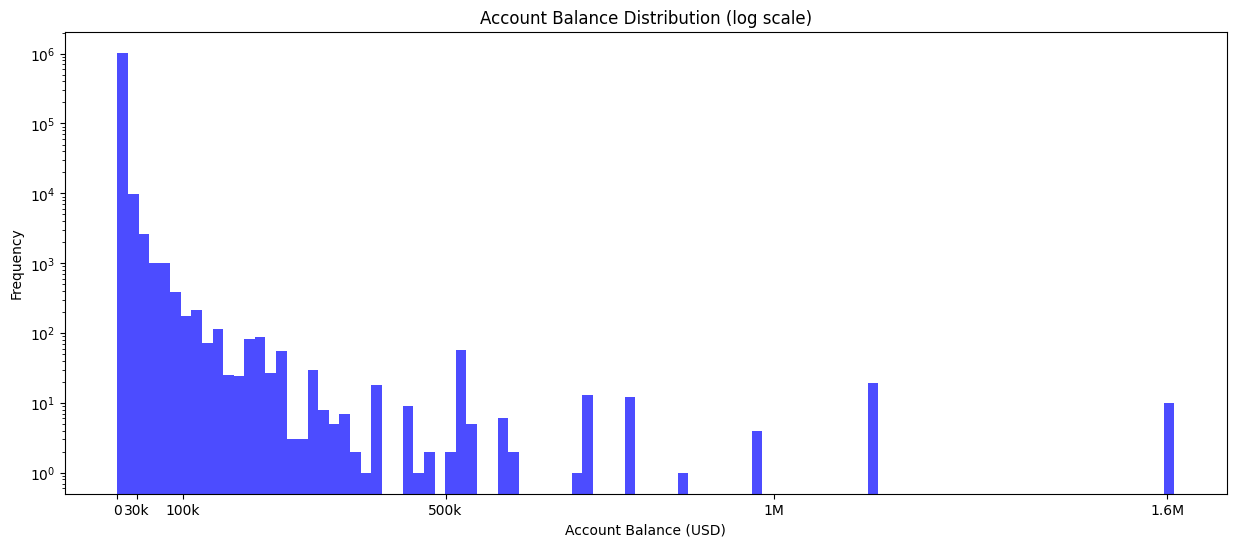

In [ ]:
# Plot the distribution of account balance

plt.figure(figsize=(15, 6))
plt.hist(df["CustAccountBalance"], bins=100, color='blue', alpha=0.7, log=True)
plt.xticks(ticks=[0, 30000, 100000, 500000, 1000000, 1600000], labels=["0", "30k", "100k", "500k", "1M", "1.6M"])
plt.xlabel("Account Balance (USD)")
plt.ylabel("Frequency")
plt.title("Account Balance Distribution (log scale)")
plt.show()

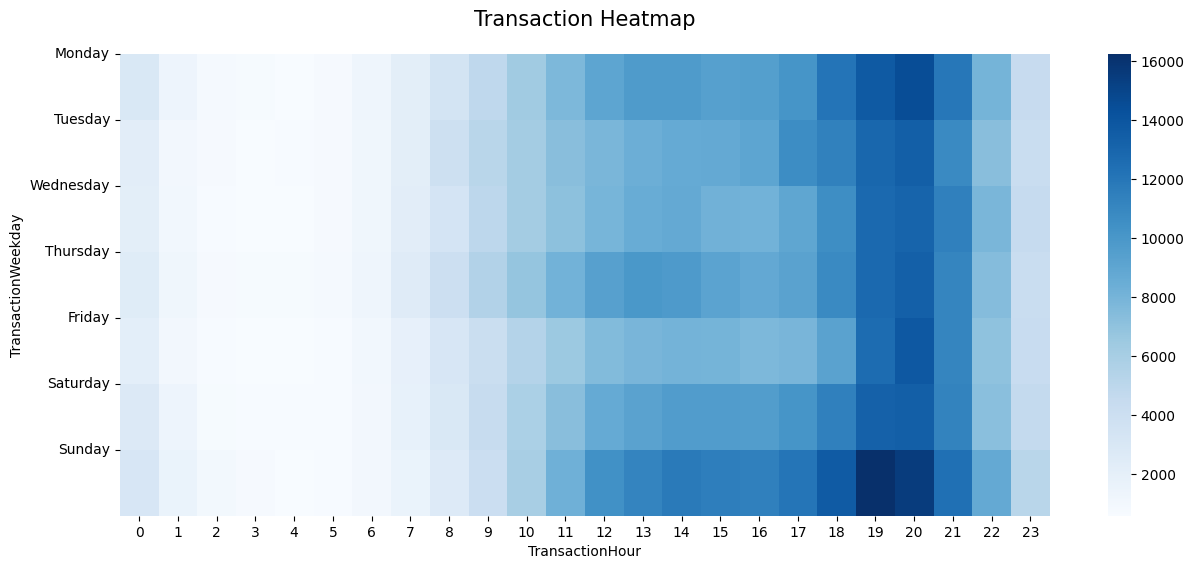

In [ ]:
# Generate a heatmap of transactions by weekday and hour
data = df.groupby("TransactionWeekday")["TransactionHour"].value_counts()

plt.figure(figsize=(15, 6))
sns.heatmap(data.unstack(), cmap="Blues")
plt.title("Transaction Heatmap", pad=20, fontsize=15)
plt.yticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=0)
plt.show()

Between 19:00 - 20:00 are the most transactions. According to the data Sunday 19:00 is the time with the most transactions. 

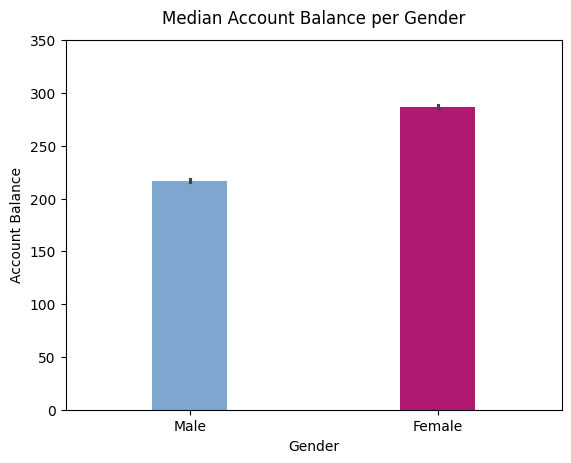

In [116]:
# Compare account balance between Genders
import warnings
warnings.filterwarnings("ignore")

sns.barplot(x="CustGender", y="CustAccountBalance", data=df, estimator=np.median, palette=["#6fa8dc", "#c90076"], width=0.3)
plt.title("Median Account Balance per Gender", pad=12)
plt.ylim(0, 350)
plt.xticks(ticks=[0,1], labels=["Male", "Female"])
plt.xlabel("Gender")
plt.ylabel("Account Balance")
plt.show()

### Customer Segmentation with K-Means Clustering

#### Elbow Method

With the Elbow Method you can find the optimal number of clusters for your data by plotting the within-cluster sum of squares (WCSS) against k. The ideal k is where the WCSS curve shows a sharp bend (like an "elbow").

In [75]:
from sklearn.cluster import KMeans

X = df[["CustGender", "CustAccountBalance", "TransactionAmount (USD)", "CustomerAge"]].dropna()

wcss = []
n_cluster = 10

for i in range(1, n_cluster+1):
    kmeans = KMeans(n_clusters = i, 
                    init = "k-means++", 
                    max_iter = 300, 
                    n_init = 10, 
                    random_state = 42)
    kmeans.fit(X) 
    
    wcss.append(kmeans.inertia_) # Append 

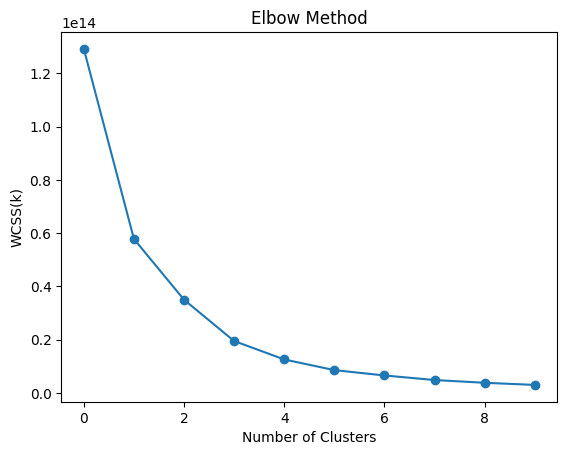

In [76]:
plt.plot(wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS(k)")
plt.show()

Choosing k = 3 seems to be a good tradeoff between minimizing within-cluster variance and avoiding unnecessary complexity

### Create k=3 Clusters

In [77]:
kmeans = KMeans(n_clusters = 3, 
                    init = "k-means++", 
                    max_iter = 300, 
                    n_init = 10, 
                    random_state = 42)
ykmeans = kmeans.fit_predict(X) 
ykmeans.shape

(985637,)

In [78]:
X["Cluster"] = ykmeans
X.groupby("Cluster").median()

,CustGender,CustAccountBalance,TransactionAmount (USD),CustomerAge
Cluster,,,,
0,0.0,222.19638,6.020,29.0
1,0.0,521567.99660,31.556,63.0
2,0.0,70277.51514,22.120,41.0


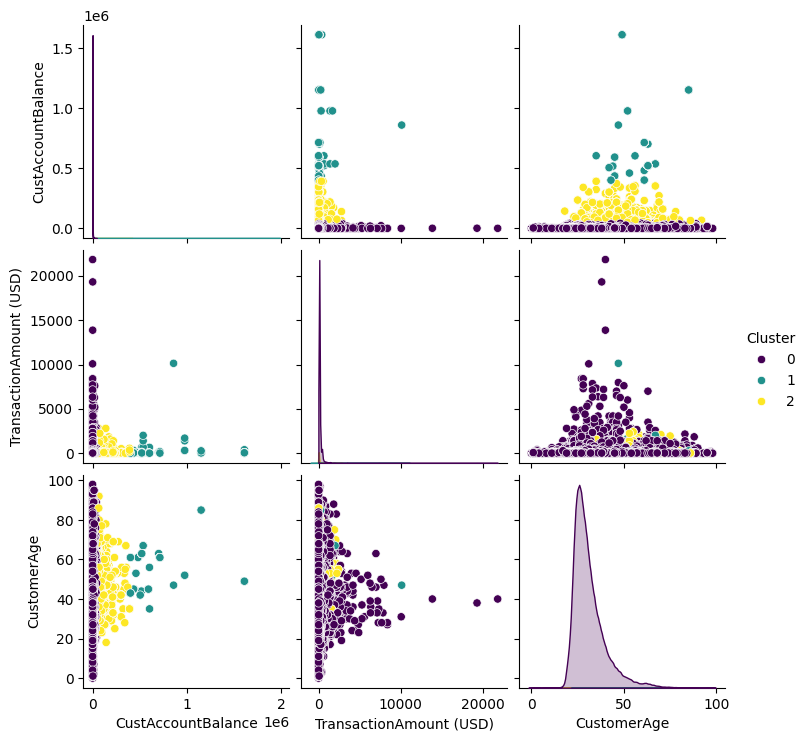

In [115]:
X = X[["CustAccountBalance", "TransactionAmount (USD)", "CustomerAge", "Cluster"]]

sns.pairplot(X, hue="Cluster", palette="viridis")
plt.show()

In [114]:
X["Cluster"].value_counts()


0    982317
2      3177
1       143
Name: Cluster, dtype: int64

#### Conclusion
It seems that the algorithm created 3 customer cluster based on account balance. Cluster 0 consists of younger customers with a low or average balance, which make up more than 99.5% of all Customers. Cluster 2 represents those with a higher balance, and Cluster 1 includes older customers with a very high account balance. 